In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models, Model
import numpy as np


# fancy graphics
plt.style.use('seaborn')
plt.tight_layout()

<Figure size 576x396 with 0 Axes>

## Plotting methods of training and validation loss

In [2]:
def plotLoss(losses, loss_fn, ep_first_phase=None):
    #Plotting the validation and training errors
    x_axis = range(1,len(losses['loss'])+1)

    if ep_first_phase is not None:
        plt.axvline(ep_first_phase, c='teal', linestyle='--', label='End of first training phase')
    plt.plot(x_axis, losses['loss'], label='Training loss', c='orange')
    plt.plot(x_axis, losses['val_loss'], label='Validation loss', linestyle='-.', c='brown', linewidth=2)

    plt.xlabel('Epochs')
    plt.ylabel(loss_fn)
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [3]:
def plotAll(experiments): # argument is list with hyperparams and train/val losses
    fig, axes = plt.subplots(1,len(experiments), sharey=True, figsize=(12,12))
    axes = axes.ravel()
    titles = ['Best', 'Complex', 'Smaller latent layer', 'Bigger latent layer']
    for i,(ax,exp) in enumerate(zip(axes,experiments)):
        ax.yaxis.set_tick_params(labelbottom=True)
        x_axis = range(1,exp['ep']+1)
        ax.plot(x_axis, exp['loss'], label='Training loss', c='orange')
        ax.plot(x_axis, exp['val_loss'], label='Validation loss', linestyle='-.', c='brown', linewidth=2)
        ax.set_xlabel('Epochs')
        if i == 0:
            ax.set_ylabel('Mean Squared Error')
        ax.set_title(titles[i])


    plt.legend()
    plt.show()

### Paths

In [4]:
models_dir = 'autoencoders_project3/'

# files with models
complex_dim10 = 'complex_dim10.h5'
simple_dim5 = 'simple_dim5.h5'
simple_dim10 = 'simple_dim10.h5'
simple_dim20 = 'simple_dim20.h5'

# files with json info
complex_dim10_info_fname = 'complex_dim10.json'
simple_dim5_info_fname = 'simple_dim5.json'
simple_dim10_info_fname = 'simple_dim10.json'
simple_dim20_info_fname = 'simple_dim20.json'

# files with losses info
complex_dim10_loss_fname = 'complex_dim10.loss.npy'
simple_dim5_loss_fname = 'simple_dim5.loss.npy'
simple_dim10_loss_fname = 'simple_dim10.loss.npy'
simple_dim20_loss_fname = 'simple_dim20.loss.npy'

## We have researched 4 autoencoder models, namely:

### - A model (simple_dim10) that we think is the best because it achieves an optimal loss minimization and it is time efficient compared to models that are deeper layer-wise and more complex

### - A model (complex_dim10) that uses a lot of convolution and normalization layers, i.e. is deeper. We use this model to show that there is no gain in loss minimization, moreover this model takes approximately double the time for each epoch compared to our best model (simple_dim10)

### - Two models (simple_dim5/simple_dim20) that have the same architecture with our best model but use different number of neurons in the latent layer i.e. produce latent vectors of dimensions 5 and 20

### Below we provide an overview of the model architectures and training iterations for all 3 models

### Best model

In [5]:
model = models.load_model(models_dir + simple_dim10, compile= False)

In [6]:
model.summary()

Model: "N1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0        

In [7]:
# model name : simple_dim10

# training stats
dummy = \
"""
Epoch 1/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0410 - val_loss: 0.0323
Epoch 2/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0278 - val_loss: 0.0273
Epoch 3/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0253 - val_loss: 0.0263
Epoch 4/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 5/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0230 - val_loss: 0.0241
Epoch 6/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0223 - val_loss: 0.0232
Epoch 7/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0218 - val_loss: 0.0222
Epoch 8/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0214 - val_loss: 0.0222
Epoch 9/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0210 - val_loss: 0.0222
Epoch 10/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0207 - val_loss: 0.0219
Epoch 11/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0204 - val_loss: 0.0214
Epoch 12/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0202 - val_loss: 0.0213
Epoch 13/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0199 - val_loss: 0.0209
Epoch 14/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0198 - val_loss: 0.0207
Epoch 15/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0196 - val_loss: 0.0207
Epoch 16/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0194 - val_loss: 0.0208
Epoch 17/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0193 - val_loss: 0.0207
Epoch 18/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0191 - val_loss: 0.0206
Epoch 19/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0190 - val_loss: 0.0204
Epoch 20/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0189 - val_loss: 0.0205
Epoch 21/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0188 - val_loss: 0.0206
Epoch 22/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0187 - val_loss: 0.0205
Epoch 23/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0186 - val_loss: 0.0201
Epoch 24/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0185 - val_loss: 0.0203
Epoch 25/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0184 - val_loss: 0.0204
Epoch 26/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0183 - val_loss: 0.0202
Epoch 27/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0183 - val_loss: 0.0202
Epoch 28/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0182 - val_loss: 0.0201
Epoch 29/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0181 - val_loss: 0.0200
Epoch 30/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0180 - val_loss: 0.0201
Epoch 31/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0180 - val_loss: 0.0201
Epoch 32/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0179 - val_loss: 0.0200
Epoch 33/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0178 - val_loss: 0.0201
Epoch 34/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0178 - val_loss: 0.0202
Epoch 35/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0177 - val_loss: 0.0200
Epoch 36/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0177 - val_loss: 0.0200
Epoch 37/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0176 - val_loss: 0.0199
Epoch 38/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0176 - val_loss: 0.0199
Epoch 39/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0175 - val_loss: 0.0201
Epoch 40/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0175 - val_loss: 0.0198
Epoch 41/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0174 - val_loss: 0.0200
Epoch 42/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0174 - val_loss: 0.0197
Epoch 43/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0173 - val_loss: 0.0199
Epoch 44/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0173 - val_loss: 0.0198
Epoch 45/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0172 - val_loss: 0.0201
Epoch 46/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0172 - val_loss: 0.0198
Epoch 47/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0172 - val_loss: 0.0201
Epoch 48/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0171 - val_loss: 0.0199
Epoch 49/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0171 - val_loss: 0.0198
Epoch 50/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0171 - val_loss: 0.0197
Epoch 51/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0170 - val_loss: 0.0197
Epoch 52/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0170 - val_loss: 0.0198
Epoch 53/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0169 - val_loss: 0.0200
Epoch 54/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0169 - val_loss: 0.0198
Epoch 55/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0169 - val_loss: 0.0198
Epoch 56/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0168 - val_loss: 0.0199
Epoch 57/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0168 - val_loss: 0.0198
Epoch 58/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0168 - val_loss: 0.0200
Epoch 59/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0167 - val_loss: 0.0199
Epoch 60/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0167 - val_loss: 0.0198
Epoch 61/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0167 - val_loss: 0.0201
Epoch 62/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0166 - val_loss: 0.0198
Epoch 63/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0166 - val_loss: 0.0199
Epoch 64/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0166 - val_loss: 0.0197
Epoch 65/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0166 - val_loss: 0.0200
Epoch 66/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0165 - val_loss: 0.0198
Epoch 67/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0165 - val_loss: 0.0200
Epoch 68/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0165 - val_loss: 0.0198
Epoch 69/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0165 - val_loss: 0.0199
Epoch 70/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0164 - val_loss: 0.0198
Epoch 71/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0164 - val_loss: 0.0198
Epoch 72/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0164 - val_loss: 0.0198
Epoch 73/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0164 - val_loss: 0.0199
Epoch 74/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0163 - val_loss: 0.0199
Epoch 75/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0163 - val_loss: 0.0198
Epoch 76/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0163 - val_loss: 0.0199
Epoch 77/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0163 - val_loss: 0.0201
Epoch 78/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0163 - val_loss: 0.0198
Epoch 79/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0162 - val_loss: 0.0199
Epoch 80/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0162 - val_loss: 0.0198
Epoch 81/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0162 - val_loss: 0.0199
Epoch 82/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0162 - val_loss: 0.0199
Epoch 83/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0162 - val_loss: 0.0200
Epoch 84/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0161 - val_loss: 0.0199
Epoch 85/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0161 - val_loss: 0.0199
Epoch 86/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0161 - val_loss: 0.0199
Epoch 87/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0161 - val_loss: 0.0200
Epoch 88/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0161 - val_loss: 0.0199
Epoch 89/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0161 - val_loss: 0.0199
Epoch 90/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0160 - val_loss: 0.0201
Epoch 91/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0160 - val_loss: 0.0198
Epoch 92/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0160 - val_loss: 0.0200
Epoch 93/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0160 - val_loss: 0.0200
Epoch 94/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0160 - val_loss: 0.0201
Epoch 95/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0159 - val_loss: 0.0201
Epoch 96/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0159 - val_loss: 0.0199
Epoch 97/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0159 - val_loss: 0.0199
Epoch 98/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0159 - val_loss: 0.0200
Epoch 99/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0159 - val_loss: 0.0201
Epoch 100/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0159 - val_loss: 0.0201
"""

### Complex model

In [8]:
model = models.load_model(models_dir + complex_dim10, compile= False)

In [9]:
model.summary()

Model: "N1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496    

### Below we can see that the more complex model has no significant advantage with comparison to our best model

In [10]:
# model name : complex_dim10

# training stats
dummy = \
"""
Epoch 1/100
750/750 [==============================] - 13s 18ms/step - loss: 0.0427 - val_loss: 0.0402
Epoch 2/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0280 - val_loss: 0.0296
Epoch 3/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0251 - val_loss: 0.0266
Epoch 4/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0234 - val_loss: 0.0243
Epoch 5/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0223 - val_loss: 0.0223
Epoch 6/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0214 - val_loss: 0.0228
Epoch 7/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0208 - val_loss: 0.0214
Epoch 8/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0202 - val_loss: 0.0211
Epoch 9/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0198 - val_loss: 0.0210
Epoch 10/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0194 - val_loss: 0.0202
Epoch 11/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0191 - val_loss: 0.0209
Epoch 12/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0188 - val_loss: 0.0197
Epoch 13/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0185 - val_loss: 0.0203
Epoch 14/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0183 - val_loss: 0.0207
Epoch 15/100
750/750 [==============================] - 13s 18ms/step - loss: 0.0181 - val_loss: 0.0196
Epoch 16/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0178 - val_loss: 0.0193
Epoch 17/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0177 - val_loss: 0.0196
Epoch 18/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0175 - val_loss: 0.0194
Epoch 19/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0173 - val_loss: 0.0192
Epoch 20/100
750/750 [==============================] - 13s 18ms/step - loss: 0.0172 - val_loss: 0.0204
Epoch 21/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0170 - val_loss: 0.0195
Epoch 22/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0169 - val_loss: 0.0193
Epoch 23/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0167 - val_loss: 0.0193
Epoch 24/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0166 - val_loss: 0.0192
Epoch 25/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0165 - val_loss: 0.0192
Epoch 26/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0164 - val_loss: 0.0195
Epoch 27/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0162 - val_loss: 0.0194
Epoch 28/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0162 - val_loss: 0.0193
Epoch 29/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0161 - val_loss: 0.0192
Epoch 30/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0160 - val_loss: 0.0195
Epoch 31/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0159 - val_loss: 0.0190
Epoch 32/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0158 - val_loss: 0.0192
Epoch 33/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0157 - val_loss: 0.0190
Epoch 34/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0156 - val_loss: 0.0189
Epoch 35/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0155 - val_loss: 0.0193
Epoch 36/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0155 - val_loss: 0.0191
Epoch 37/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0154 - val_loss: 0.0190
Epoch 38/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0153 - val_loss: 0.0190
Epoch 39/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0152 - val_loss: 0.0190
Epoch 40/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0151 - val_loss: 0.0190
Epoch 41/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0151 - val_loss: 0.0191
Epoch 42/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0150 - val_loss: 0.0190
Epoch 43/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0149 - val_loss: 0.0191
Epoch 44/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0149 - val_loss: 0.0195
Epoch 45/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0148 - val_loss: 0.0193
Epoch 46/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0148 - val_loss: 0.0190
Epoch 47/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0147 - val_loss: 0.0192
Epoch 48/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0147 - val_loss: 0.0192
Epoch 49/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0146 - val_loss: 0.0192
Epoch 50/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0145 - val_loss: 0.0192
Epoch 51/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0145 - val_loss: 0.0192
Epoch 52/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0144 - val_loss: 0.0191
Epoch 53/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0144 - val_loss: 0.0194
Epoch 54/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0143 - val_loss: 0.0192
Epoch 55/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0143 - val_loss: 0.0192
Epoch 56/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0142 - val_loss: 0.0192
Epoch 57/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0142 - val_loss: 0.0196
Epoch 58/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0141 - val_loss: 0.0193
Epoch 59/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0141 - val_loss: 0.0195
Epoch 60/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0140 - val_loss: 0.0191
Epoch 61/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0140 - val_loss: 0.0194
Epoch 62/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0139 - val_loss: 0.0194
Epoch 63/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0139 - val_loss: 0.0197
Epoch 64/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0138 - val_loss: 0.0194
Epoch 65/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0138 - val_loss: 0.0195
Epoch 66/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0138 - val_loss: 0.0195
Epoch 67/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0137 - val_loss: 0.0194
Epoch 68/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0137 - val_loss: 0.0195
Epoch 69/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0136 - val_loss: 0.0194
Epoch 70/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0136 - val_loss: 0.0196
Epoch 71/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0136 - val_loss: 0.0195
Epoch 72/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0135 - val_loss: 0.0195
Epoch 73/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0135 - val_loss: 0.0200
Epoch 74/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0135 - val_loss: 0.0197
Epoch 75/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0134 - val_loss: 0.0198
Epoch 76/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0134 - val_loss: 0.0196
Epoch 77/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0134 - val_loss: 0.0198
Epoch 78/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0133 - val_loss: 0.0198
Epoch 79/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0133 - val_loss: 0.0196
Epoch 80/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0132 - val_loss: 0.0197
Epoch 81/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0132 - val_loss: 0.0198
Epoch 82/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0132 - val_loss: 0.0199
Epoch 83/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0131 - val_loss: 0.0197
Epoch 84/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0131 - val_loss: 0.0198
Epoch 85/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0131 - val_loss: 0.0197
Epoch 86/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0131 - val_loss: 0.0199
Epoch 87/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0130 - val_loss: 0.0199
Epoch 88/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0130 - val_loss: 0.0199
Epoch 89/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0130 - val_loss: 0.0199
Epoch 90/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0129 - val_loss: 0.0200
Epoch 91/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0129 - val_loss: 0.0201
Epoch 92/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0129 - val_loss: 0.0198
Epoch 93/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0129 - val_loss: 0.0199
Epoch 94/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0128 - val_loss: 0.0201
Epoch 95/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0128 - val_loss: 0.0200
Epoch 96/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0128 - val_loss: 0.0201
Epoch 97/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0127 - val_loss: 0.0201
Epoch 98/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0127 - val_loss: 0.0200
Epoch 99/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0127 - val_loss: 0.0201
Epoch 100/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0127 - val_loss: 0.0200
"""

### Smaller latent layer model

In [11]:
model = models.load_model(models_dir + simple_dim5, compile= False)

In [12]:
model.summary()

Model: "N1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0        

In [13]:
# model name : simple_dim5

# training stats
dummy = \
"""
Epoch 1/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0537 - val_loss: 0.0471
Epoch 2/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0417 - val_loss: 0.0417
Epoch 3/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0397 - val_loss: 0.0398
Epoch 4/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0384 - val_loss: 0.0385
Epoch 5/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0376 - val_loss: 0.0388
Epoch 6/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0369 - val_loss: 0.0386
Epoch 7/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0365 - val_loss: 0.0374
Epoch 8/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0360 - val_loss: 0.0363
Epoch 9/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0357 - val_loss: 0.0367
Epoch 10/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0354 - val_loss: 0.0363
Epoch 11/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0352 - val_loss: 0.0362
Epoch 12/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0349 - val_loss: 0.0359
Epoch 13/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0347 - val_loss: 0.0358
Epoch 14/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0346 - val_loss: 0.0356
Epoch 15/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0344 - val_loss: 0.0363
Epoch 16/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0342 - val_loss: 0.0355
Epoch 17/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0341 - val_loss: 0.0353
Epoch 18/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0340 - val_loss: 0.0352
Epoch 19/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0338 - val_loss: 0.0354
Epoch 20/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0337 - val_loss: 0.0349
Epoch 21/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0336 - val_loss: 0.0354
Epoch 22/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0335 - val_loss: 0.0350
Epoch 23/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0334 - val_loss: 0.0350
Epoch 24/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0333 - val_loss: 0.0351
Epoch 25/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0332 - val_loss: 0.0349
Epoch 26/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0331 - val_loss: 0.0347
Epoch 27/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0331 - val_loss: 0.0348
Epoch 28/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0330 - val_loss: 0.0347
Epoch 29/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0329 - val_loss: 0.0347
Epoch 30/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0328 - val_loss: 0.0345
Epoch 31/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0327 - val_loss: 0.0349
Epoch 32/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0327 - val_loss: 0.0350
Epoch 33/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0326 - val_loss: 0.0350
Epoch 34/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0326 - val_loss: 0.0347
Epoch 35/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0325 - val_loss: 0.0349
Epoch 36/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0325 - val_loss: 0.0346
Epoch 37/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0324 - val_loss: 0.0346
Epoch 38/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0324 - val_loss: 0.0346
Epoch 39/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0323 - val_loss: 0.0347
Epoch 40/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0323 - val_loss: 0.0346
Epoch 41/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0322 - val_loss: 0.0350
Epoch 42/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0322 - val_loss: 0.0349
Epoch 43/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0321 - val_loss: 0.0347
Epoch 44/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0321 - val_loss: 0.0346
Epoch 45/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0321 - val_loss: 0.0346
Epoch 46/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0320 - val_loss: 0.0346
Epoch 47/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0320 - val_loss: 0.0346
Epoch 48/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0319 - val_loss: 0.0345
Epoch 49/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0319 - val_loss: 0.0344
Epoch 50/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0319 - val_loss: 0.0347
Epoch 51/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0318 - val_loss: 0.0346
Epoch 52/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0318 - val_loss: 0.0345
Epoch 53/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0317 - val_loss: 0.0348
Epoch 54/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0317 - val_loss: 0.0346
Epoch 55/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0317 - val_loss: 0.0349
Epoch 56/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0316 - val_loss: 0.0346
Epoch 57/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0316 - val_loss: 0.0345
Epoch 58/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0315 - val_loss: 0.0345
Epoch 59/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0315 - val_loss: 0.0346
Epoch 60/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0315 - val_loss: 0.0345
Epoch 61/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0314 - val_loss: 0.0346
Epoch 62/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0314 - val_loss: 0.0348
Epoch 63/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0314 - val_loss: 0.0346
Epoch 64/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0314 - val_loss: 0.0344
Epoch 65/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0313 - val_loss: 0.0346
Epoch 66/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0313 - val_loss: 0.0344
Epoch 67/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0313 - val_loss: 0.0344
Epoch 68/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0313 - val_loss: 0.0347
Epoch 69/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0312 - val_loss: 0.0346
Epoch 70/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0312 - val_loss: 0.0344
Epoch 71/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0312 - val_loss: 0.0345
Epoch 72/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0312 - val_loss: 0.0347
Epoch 73/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0311 - val_loss: 0.0346
Epoch 74/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0312 - val_loss: 0.0345
Epoch 75/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0311 - val_loss: 0.0348
Epoch 76/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0311 - val_loss: 0.0345
Epoch 77/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0310 - val_loss: 0.0346
Epoch 78/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0311 - val_loss: 0.0347
Epoch 79/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0310 - val_loss: 0.0345
Epoch 80/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0310 - val_loss: 0.0345
Epoch 81/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0310 - val_loss: 0.0346
Epoch 82/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0309 - val_loss: 0.0346
Epoch 83/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0309 - val_loss: 0.0346
Epoch 84/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0309 - val_loss: 0.0347
Epoch 85/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0309 - val_loss: 0.0346
Epoch 86/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0308 - val_loss: 0.0346
Epoch 87/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0308 - val_loss: 0.0348
Epoch 88/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0308 - val_loss: 0.0346
Epoch 89/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0308 - val_loss: 0.0348
Epoch 90/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0308 - val_loss: 0.0346
Epoch 91/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0308 - val_loss: 0.0347
Epoch 92/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0308 - val_loss: 0.0347
Epoch 93/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0307 - val_loss: 0.0347
Epoch 94/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0307 - val_loss: 0.0348
Epoch 95/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0307 - val_loss: 0.0347
Epoch 96/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0307 - val_loss: 0.0348
Epoch 97/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0306 - val_loss: 0.0347
Epoch 98/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0306 - val_loss: 0.0347
Epoch 99/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0306 - val_loss: 0.0348
Epoch 100/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0306 - val_loss: 0.0349
"""

### Bigger latent layer model

In [14]:
model = models.load_model(models_dir + simple_dim20, compile= False)

In [15]:
model.summary()

Model: "N1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0        

In [16]:
# model name : simple_dim20

# training stats
dummy = \
"""
Epoch 1/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0313 - val_loss: 0.0180
Epoch 2/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0175 - val_loss: 0.0198
Epoch 3/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0153 - val_loss: 0.0154
Epoch 4/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0141 - val_loss: 0.0150
Epoch 5/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0133 - val_loss: 0.0140
Epoch 6/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0128 - val_loss: 0.0137
Epoch 7/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0123 - val_loss: 0.0158
Epoch 8/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0120 - val_loss: 0.0127
Epoch 9/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0117 - val_loss: 0.0124
Epoch 10/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 11/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0112 - val_loss: 0.0117
Epoch 12/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0109 - val_loss: 0.0123
Epoch 13/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0108 - val_loss: 0.0123
Epoch 14/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0106 - val_loss: 0.0125
Epoch 15/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0105 - val_loss: 0.0117
Epoch 16/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0103 - val_loss: 0.0119
Epoch 17/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0102 - val_loss: 0.0112
Epoch 18/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0101 - val_loss: 0.0115
Epoch 19/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0100 - val_loss: 0.0116
Epoch 20/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0099 - val_loss: 0.0109
Epoch 21/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0098 - val_loss: 0.0109
Epoch 22/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0097 - val_loss: 0.0113
Epoch 23/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0096 - val_loss: 0.0119
Epoch 24/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0095 - val_loss: 0.0110
Epoch 25/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0094 - val_loss: 0.0106
Epoch 26/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0094 - val_loss: 0.0109
Epoch 27/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0093 - val_loss: 0.0107
Epoch 28/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0092 - val_loss: 0.0107
Epoch 29/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0092 - val_loss: 0.0112
Epoch 30/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0091 - val_loss: 0.0107
Epoch 31/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0091 - val_loss: 0.0110
Epoch 32/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0090 - val_loss: 0.0110
Epoch 33/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0090 - val_loss: 0.0107
Epoch 34/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0089 - val_loss: 0.0110
Epoch 35/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0089 - val_loss: 0.0107
Epoch 36/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0088 - val_loss: 0.0107
Epoch 37/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0088 - val_loss: 0.0106
Epoch 38/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0087 - val_loss: 0.0105
Epoch 39/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0087 - val_loss: 0.0105
Epoch 40/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0086 - val_loss: 0.0121
Epoch 41/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0086 - val_loss: 0.0108
Epoch 42/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0085 - val_loss: 0.0106
Epoch 43/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0085 - val_loss: 0.0108
Epoch 44/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0085 - val_loss: 0.0105
Epoch 45/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0084 - val_loss: 0.0109
Epoch 46/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0084 - val_loss: 0.0108
Epoch 47/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0084 - val_loss: 0.0107
Epoch 48/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0083 - val_loss: 0.0110
Epoch 49/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0083 - val_loss: 0.0107
Epoch 50/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0082 - val_loss: 0.0109
Epoch 51/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0082 - val_loss: 0.0109
Epoch 52/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0082 - val_loss: 0.0109
Epoch 53/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0082 - val_loss: 0.0106
Epoch 54/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0081 - val_loss: 0.0106
Epoch 55/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0081 - val_loss: 0.0105
Epoch 56/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0081 - val_loss: 0.0108
Epoch 57/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0080 - val_loss: 0.0106
Epoch 58/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0080 - val_loss: 0.0111
Epoch 59/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0080 - val_loss: 0.0107
Epoch 60/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0080 - val_loss: 0.0106
Epoch 61/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0079 - val_loss: 0.0107
Epoch 62/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0079 - val_loss: 0.0107
Epoch 63/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0079 - val_loss: 0.0108
Epoch 64/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0079 - val_loss: 0.0110
Epoch 65/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0078 - val_loss: 0.0107
Epoch 66/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0078 - val_loss: 0.0108
Epoch 67/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0078 - val_loss: 0.0111
Epoch 68/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0078 - val_loss: 0.0107
Epoch 69/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0077 - val_loss: 0.0108
Epoch 70/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0077 - val_loss: 0.0110
Epoch 71/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0077 - val_loss: 0.0107
Epoch 72/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0077 - val_loss: 0.0110
Epoch 73/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0077 - val_loss: 0.0109
Epoch 74/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0077 - val_loss: 0.0107
Epoch 75/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0076 - val_loss: 0.0111
Epoch 76/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0076 - val_loss: 0.0107
Epoch 77/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0076 - val_loss: 0.0108
Epoch 78/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0076 - val_loss: 0.0107
Epoch 79/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0075 - val_loss: 0.0108
Epoch 80/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0075 - val_loss: 0.0111
Epoch 81/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0075 - val_loss: 0.0108
Epoch 82/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0075 - val_loss: 0.0107
Epoch 83/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0075 - val_loss: 0.0108
Epoch 84/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0075 - val_loss: 0.0109
Epoch 85/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0074 - val_loss: 0.0107
Epoch 86/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0074 - val_loss: 0.0108
Epoch 87/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0074 - val_loss: 0.0108
Epoch 88/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0074 - val_loss: 0.0107
Epoch 89/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0074 - val_loss: 0.0109
Epoch 90/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0074 - val_loss: 0.0108
Epoch 91/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 92/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 93/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 94/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 95/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0073 - val_loss: 0.0108
Epoch 96/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 97/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 98/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0072 - val_loss: 0.0109
Epoch 99/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0072 - val_loss: 0.0108
Epoch 100/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0072 - val_loss: 0.0109
"""

## We will prove that these latent dimensions are not optimal in the following parts of the assignment where we use them

### Below we load the models' training and validation losses during training along with hyperparameter values

In [17]:
x = np.load(models_dir + simple_dim10_loss_fname, allow_pickle=True)
best_losses = x.tolist()

x = np.load(models_dir + complex_dim10_loss_fname, allow_pickle=True)
complex_losses = x.tolist()

x = np.load(models_dir + simple_dim5_loss_fname, allow_pickle=True)
small_lattent_losses = x.tolist()

x = np.load(models_dir + simple_dim20_loss_fname, allow_pickle=True)
big_lattent_losses = x.tolist()

## Training and validation losses over epochs

## 1) Best model

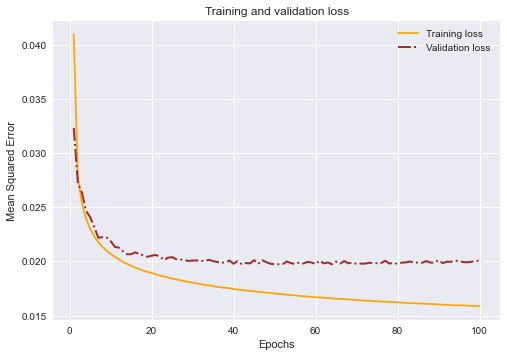

In [18]:
plotLoss(best_losses, 'Mean Squared Error')

## 2) Complex model

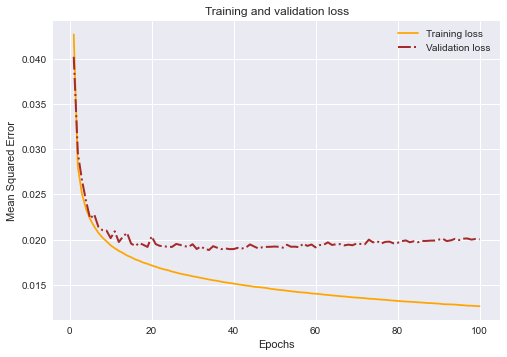

In [19]:
plotLoss(complex_losses, 'Mean Squared Error')

## 3) Smaller latent layer model

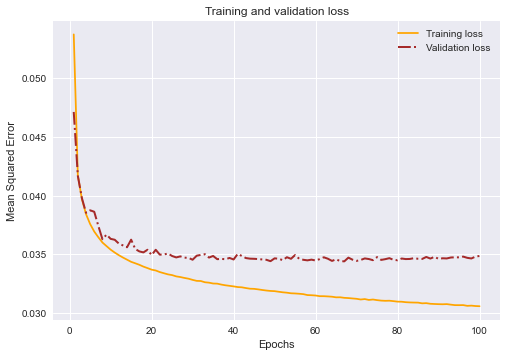

In [20]:
plotLoss(small_lattent_losses, 'Mean Squared Error')

## 4) Bigger latent layer model

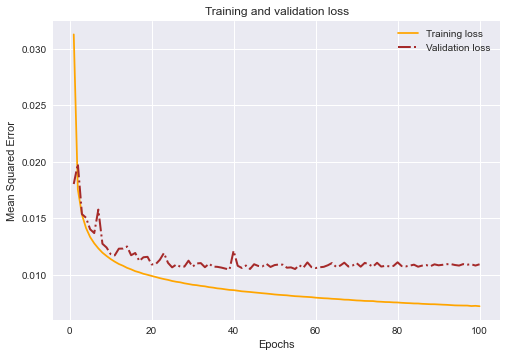

In [21]:
plotLoss(big_lattent_losses, 'Mean Squared Error')

In [22]:
import json

with open(models_dir + simple_dim10_info_fname, 'r') as fl:
    simple_dim10_info = json.load(fl)
with open(models_dir + complex_dim10_info_fname, 'r') as fl:
    complex_dim10_info = json.load(fl)
with open(models_dir + simple_dim5_info_fname, 'r') as fl:
    simple_dim5_info = json.load(fl)
with open(models_dir + simple_dim20_info_fname, 'r') as fl:
    simple_dim20_info = json.load(fl)
    
simple_dim10_info['loss'] = best_losses['loss']
simple_dim10_info['val_loss'] = best_losses['val_loss']
    
complex_dim10_info['loss'] = complex_losses['loss']
complex_dim10_info['val_loss'] = complex_losses['val_loss']
    
simple_dim5_info['loss'] = small_lattent_losses['loss']
simple_dim5_info['val_loss'] = small_lattent_losses['val_loss']

simple_dim20_info['loss'] = big_lattent_losses['loss']
simple_dim20_info['val_loss'] = big_lattent_losses['val_loss']
    
saves = [simple_dim10_info, complex_dim10_info, simple_dim5_info, simple_dim20_info]

## Plotting with the same scale for better comparison

In [23]:
%matplotlib qt
plotAll(saves)